In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from random import sample
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Check TF version
print(tf.__version__)

In [ ]:
#Import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Split data
train_source_path = 'drive/Shareddrives/spezia/ML/dataset rempah/training'
test_source_path = 'drive/Shareddrives/spezia/ML/dataset rempah/testing'

In [ ]:
for dir in os.listdir(train_source_path):
  class_dir = os.path.join(train_source_path, dir)
  print('total training images for', dir, 'is', len(os.listdir(class_dir)))

total training images for keluak is 76
total training images for lada hitam is 116
total training images for kunyit is 85
total training images for daun salam is 106
total training images for serai is 91
total training images for ketumbar is 91
total training images for pekak is 98
total training images for kayu manis is 173
total training images for cengkeh is 93
total training images for jahe is 102
total training images for kemiri is 155
total training images for daun jeruk is 91
total training images for asam jawa is 103


In [ ]:
for dir in os.listdir(test_source_path):
  class_dir = os.path.join(test_source_path, dir)
  print('total testing images for', dir, 'is', len(os.listdir(class_dir)))

total testing images for asam jawa is 12
total testing images for kemiri is 18
total testing images for kayu manis is 20
total testing images for daun jeruk is 11
total testing images for daun salam is 12
total testing images for cengkeh is 11
total testing images for jahe is 12
total testing images for keluak is 9
total testing images for ketumbar is 11
total testing images for lada hitam is 13
total testing images for pekak is 11
total testing images for serai is 11
total testing images for kunyit is 10


In [ ]:
source_path_asam_jawa = os.path.join(train_source_path, 'asam jawa')
source_path_kemiri = os.path.join(train_source_path, 'kemiri')
source_path_kayu_manis = os.path.join(train_source_path, 'kayu manis')
source_path_daun_jeruk = os.path.join(train_source_path, 'daun jeruk')
source_path_cengkeh = os.path.join(train_source_path, 'cengkeh')
source_path_daun_salam = os.path.join(train_source_path, 'daun salam')
source_path_jahe = os.path.join(train_source_path, 'jahe')
source_path_keluak = os.path.join(train_source_path, 'keluak')
source_path_ketumbar = os.path.join(train_source_path, 'ketumbar')
source_path_kunyit = os.path.join(train_source_path, 'kunyit')
source_path_lada = os.path.join(train_source_path, 'lada hitam')
source_path_pekak = os.path.join(train_source_path, 'pekak')
source_path_serai = os.path.join(train_source_path, 'serai')


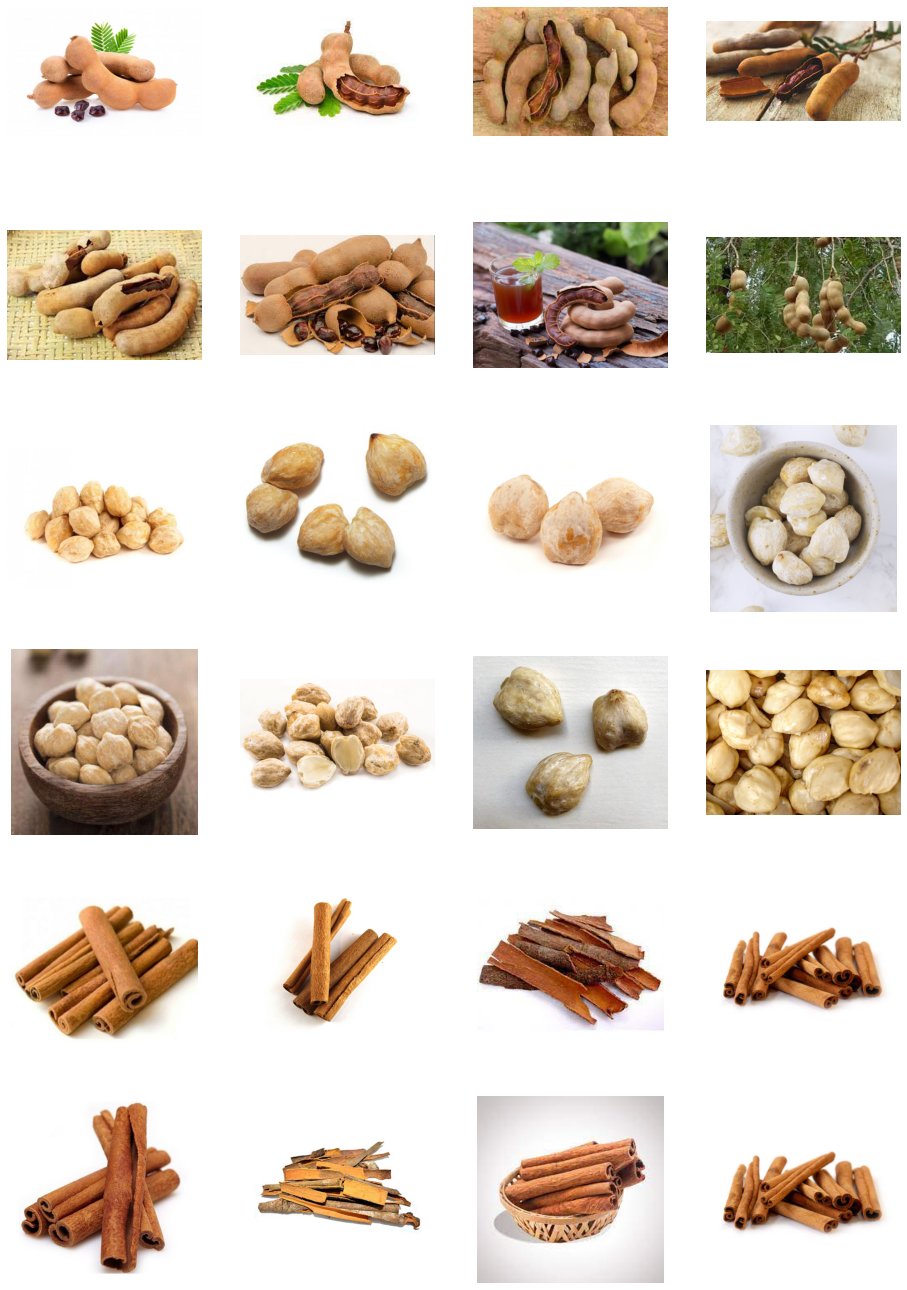

In [ ]:
%matplotlib inline


import matplotlib.image as mpimg
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_asam = [os.path.join(source_path_asam_jawa, fname) 
                for fname in os.listdir(source_path_asam_jawa)[pic_index-8:pic_index]]
next_kemiri = [os.path.join(source_path_kemiri, fname) 
                for fname in os.listdir(source_path_kemiri)[pic_index-8:pic_index]]
next_kayu = [os.path.join(source_path_kayu_manis, fname) 
                for fname in os.listdir(source_path_kayu_manis)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_asam+next_kemiri+next_kayu):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

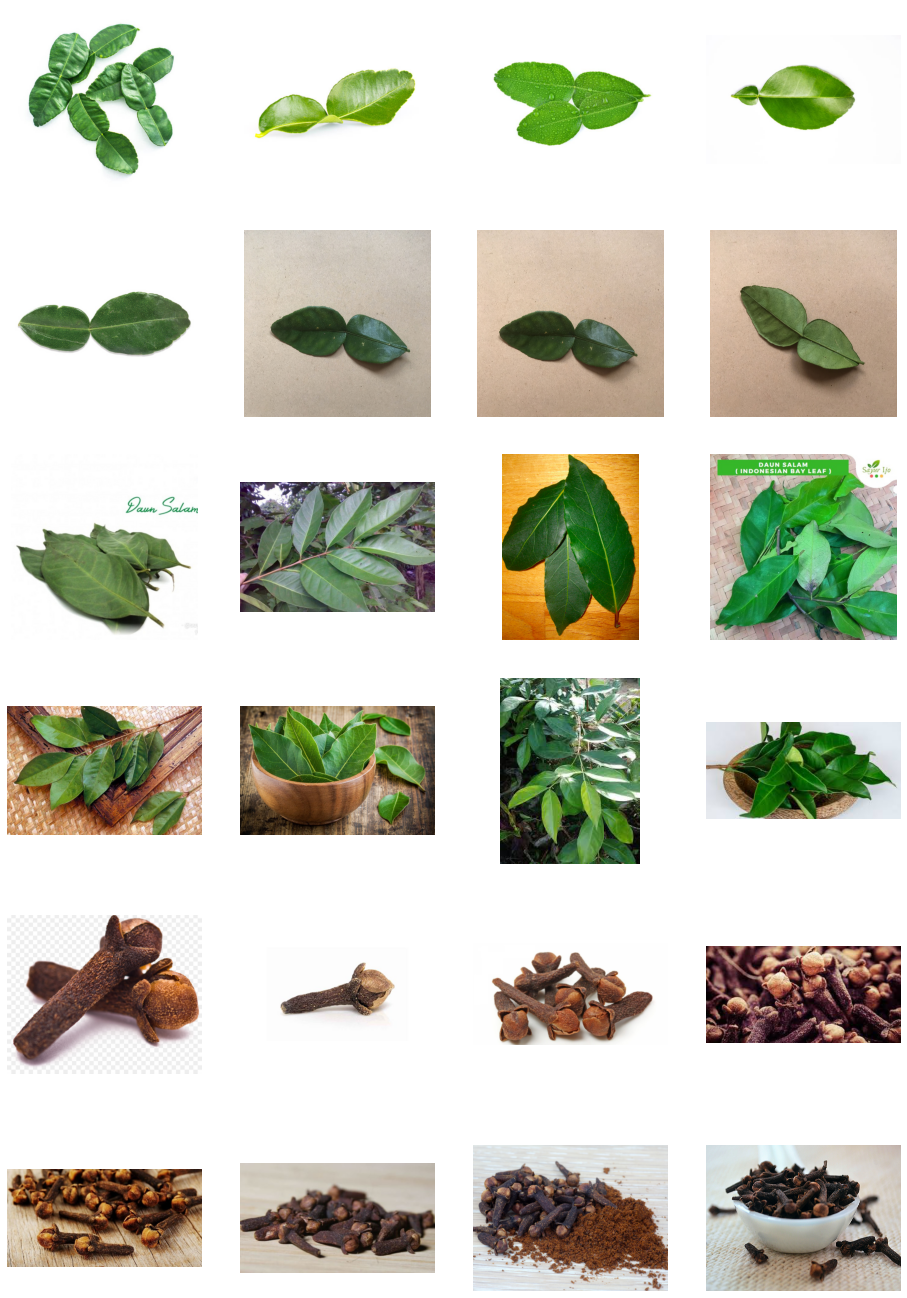

In [ ]:
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_jeruk = [os.path.join(source_path_daun_jeruk, fname) 
                for fname in os.listdir(source_path_daun_jeruk)[pic_index-8:pic_index]]
next_salam = [os.path.join(source_path_daun_salam, fname) 
                for fname in os.listdir(source_path_daun_salam)[pic_index-8:pic_index]]
next_cengkeh = [os.path.join(source_path_cengkeh, fname) 
                for fname in os.listdir(source_path_cengkeh)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jeruk+next_salam+next_cengkeh):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

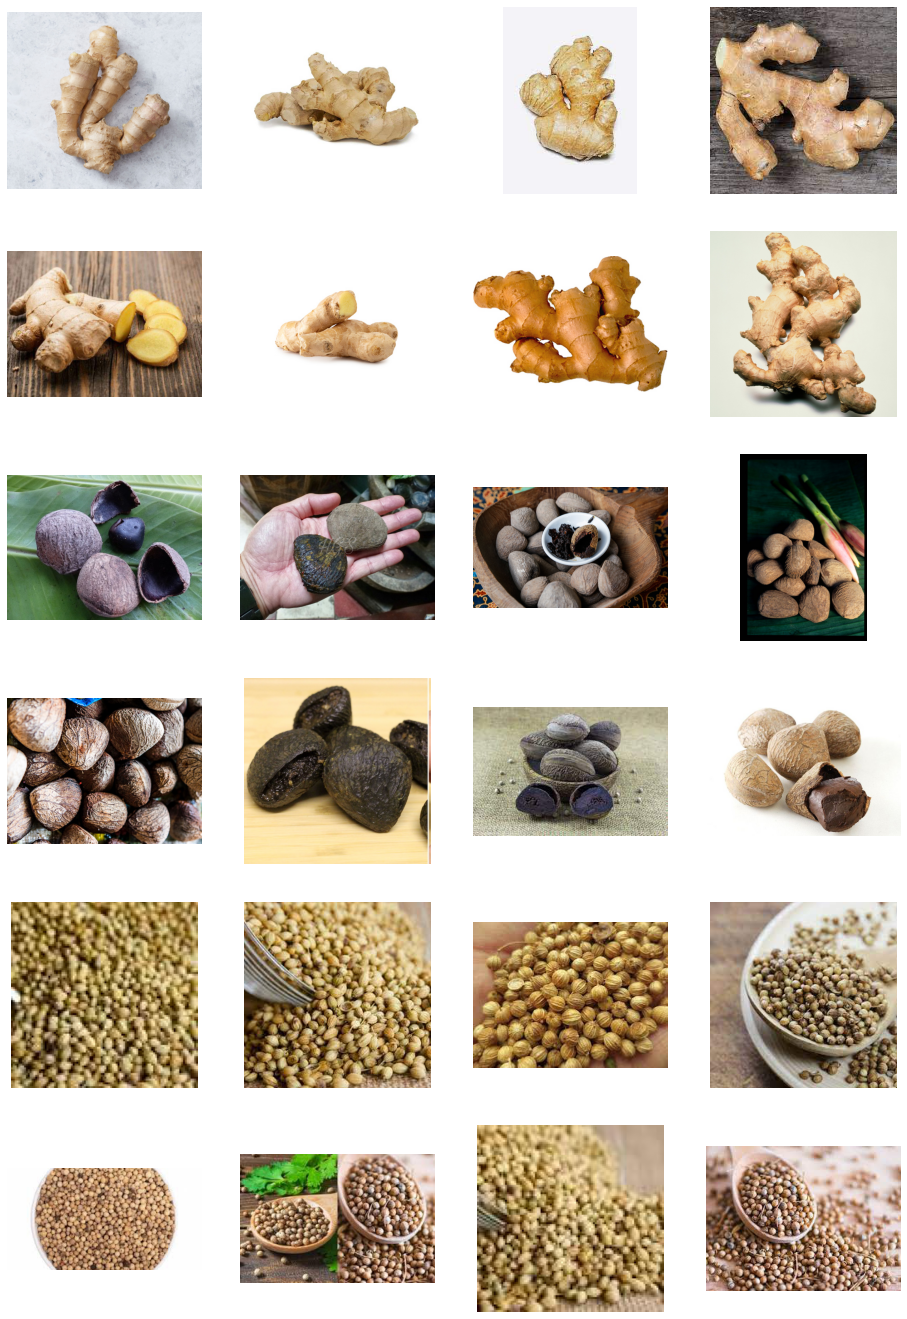

In [ ]:
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_jahe = [os.path.join(source_path_jahe, fname) 
                for fname in os.listdir(source_path_jahe)[pic_index-8:pic_index]]
next_keluak = [os.path.join(source_path_keluak, fname) 
                for fname in os.listdir(source_path_keluak)[pic_index-8:pic_index]]
next_ketumbar = [os.path.join(source_path_ketumbar, fname) 
                for fname in os.listdir(source_path_ketumbar)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jahe+next_keluak+next_ketumbar):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

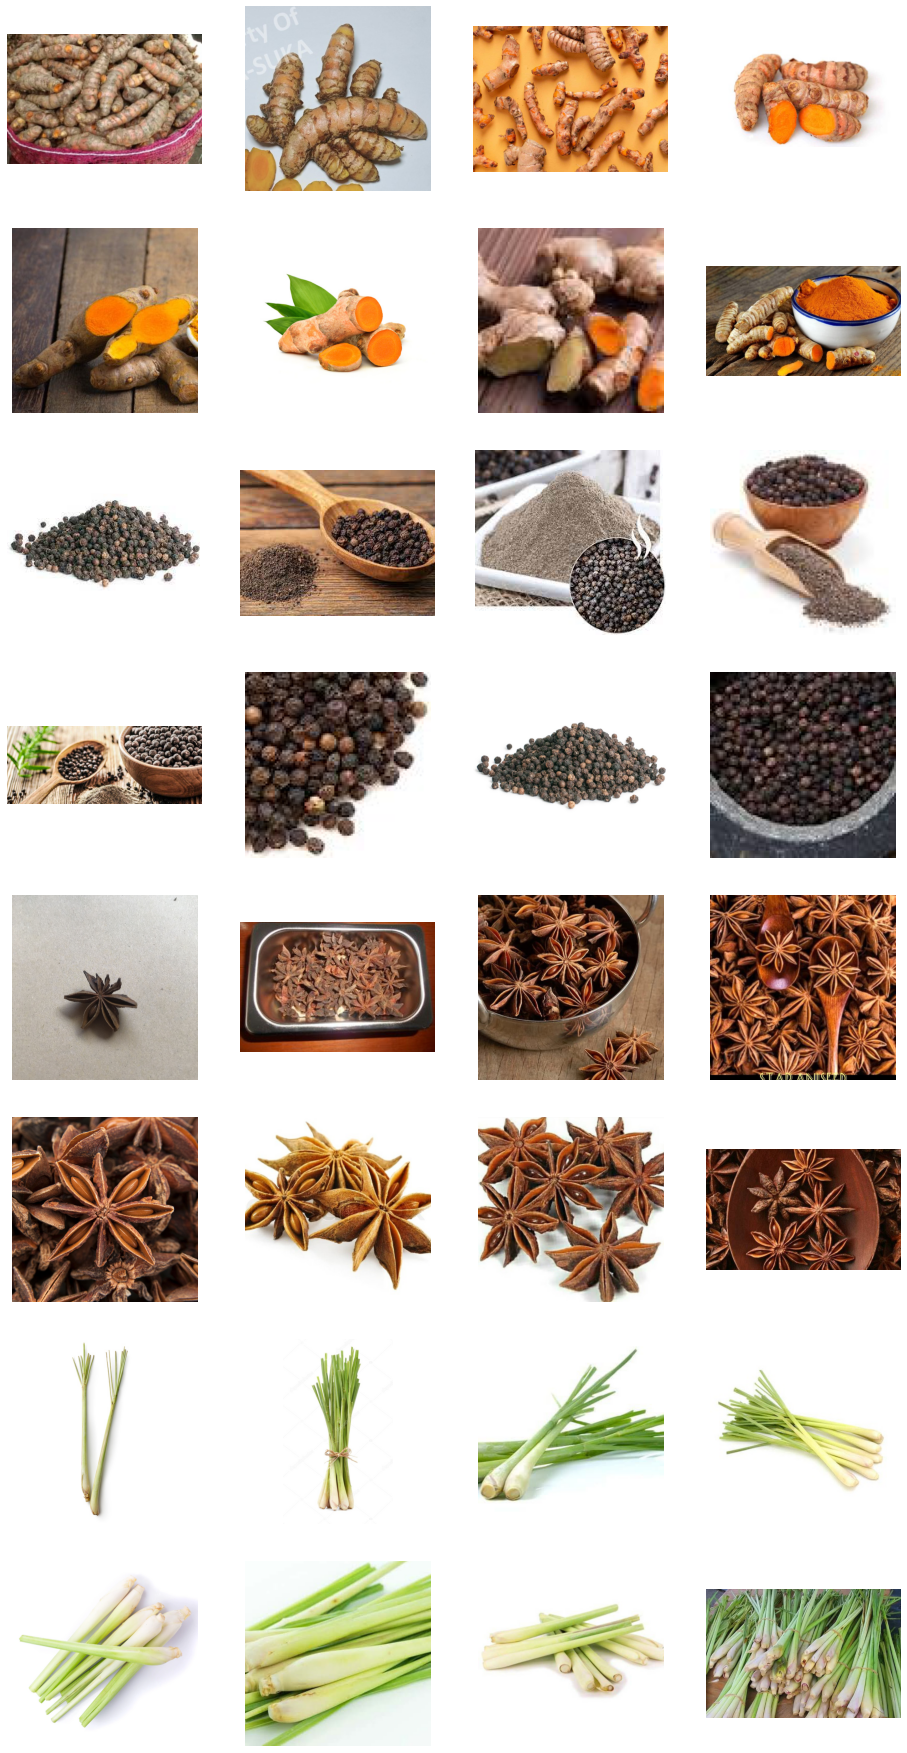

In [ ]:
nrows = 8
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_kunyit = [os.path.join(source_path_kunyit, fname) 
                for fname in os.listdir(source_path_kunyit)[pic_index-8:pic_index]]
next_lada = [os.path.join(source_path_lada, fname) 
                for fname in os.listdir(source_path_lada)[pic_index-8:pic_index]]
next_pekak = [os.path.join(source_path_pekak, fname) 
                for fname in os.listdir(source_path_pekak)[pic_index-8:pic_index]]
next_serai = [os.path.join(source_path_serai, fname) 
                for fname in os.listdir(source_path_serai)[pic_index-8:pic_index]]                

for i, img_path in enumerate(next_kunyit+next_lada+next_pekak+next_serai):
  img = plt.imread(img_path, 0)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

In [ ]:
batch_size=32
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                    #  rotation_range=90,
                                    #  width_shift_range=0.2,
                                    #  height_shift_range=0.2,
                                    #  horizontal_flip=True,
                                    #  vertical_flip=False,
                                    #  shear_range=0.3,
                                    #  zoom_range=0.3,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      color_mode= "rgb",
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                color_mode= "rgb",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(train_source_path, test_source_path)

Found 1331 images belonging to 13 classes.
Found 154 images belonging to 13 classes.


###Model 


In [ ]:
from tensorflow.keras.optimizers import RMSprop
#Create model
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), 
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(13, activation='softmax')  
  ])

  model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
      # optimizer="rmsprop",
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
#Create callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('val_loss') < 0.1):
      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so stop the training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=25,
                    verbose=1,
                    # callbacks = [callbacks],
                    steps_per_epoch = 40, 
                    validation_steps = 5,
                    validation_data = validation_generator
                   )

Epoch 1/25
40/40 [==============================] - ETA: 0s - loss: 2.4919 - accuracy: 0.1539

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/40 [==============================] - 46s 1s/step - loss: 2.4919 - accuracy: 0.1539 - val_loss: 2.3986 - val_accuracy: 0.2273
Epoch 2/25
40/40 [==============================] - 44s 1s/step - loss: 2.2693 - accuracy: 0.2549 - val_loss: 2.1333 - val_accuracy: 0.2597
Epoch 3/25
40/40 [==============================] - 45s 1s/step - loss: 1.9513 - accuracy: 0.3402 - val_loss: 1.9087 - val_accuracy: 0.3182
Epoch 4/25
40/40 [==============================] - 45s 1s/step - loss: 1.6906 - accuracy: 0.4136 - val_loss: 1.7428 - val_accuracy: 0.3961
Epoch 5/25
40/40 [==============================] - 45s 1s/step - loss: 1.4631 - accuracy: 0.5083 - val_loss: 1.4983 - val_accuracy: 0.4610
Epoch 6/25
40/40 [==============================] - 45s 1s/step - loss: 1.3174 - accuracy: 0.5454 - val_loss: 1.2887 - val_accuracy: 0.5260
Epoch 7/25
40/40 [==============================] - 45s 1s/step - loss: 1.1602 - accuracy: 0.6204 - val_loss: 1.3163 - val_accuracy: 0.5649
Epoch 8/25
40/40 [=============

In [ ]:
#Summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 17, 17, 32)     

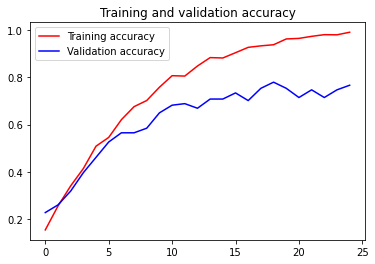

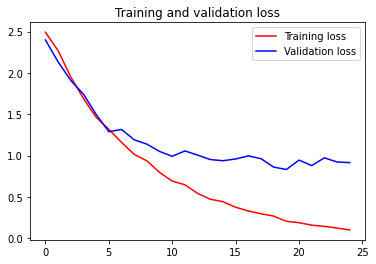

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the model
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()


plt.show()

print(train_generator)

In [ ]:
label = ['asam jawa', 'cengkeh', 'daun jeruk', 'daun salam', 'jahe', 'kayu manis', 'keluak', 'kemiri', 'ketumbar', 'kunyit', 'lada hitam', 'pekak','serai']

In [ ]:
#Test the model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  # classes_predict = model.predict_classes(images)

  # print(fn)
  print(label[np.argmax(classes)])
  # if classes[0][0] == 1.0 :
  #   print('Asam Jawa')
  # elif classes[0][1] == 1.0:
  #   print('Kemiri')
  # elif classes[0][2] == 1.0:
  #   print('Kayu Manis')
  # elif classes[0][3] == 1.0:
  #   print('Daun Jeruk')
  # elif classes[0][4] == 1.0:
  #   print('Cengkeh')
  # elif classes[0][5] == 1.0:
  #   print('Jahe')
  # elif classes[0][6] == 1.0:
  #   print('Keluak')
  # elif classes[0][7] == 1.0:
  #   print('Ketumbar')
  # elif classes[0][8] == 1.0:
  #   print('Kunyit')
  # elif classes[0][9] == 1.0:
  #   print('Lada Hitam')
  # elif classes[0][10] == 1.0:
  #   print('Pekak')
  # elif classes[0][11] == 1.0:
  #   print('Salam')
  # elif classes[0][12] == 1.0:
  #   print('Serai')

Saving serai (5).jpg to serai (5).jpg
serai


In [ ]:
#Save model to h5 format
model.save("spezia_model.h5")

In [ ]:
export_dir = 'drive/Shareddrives/spezia/ML/saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: drive/Shareddrives/spezia/ML/saved_model/assets


In [ ]:
#Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

19542124

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>